In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
%matplotlib inline

import pyoz as oz

In [2]:
sig = 1
eps = 1
wca_ref = oz.System()
r = wca_ref.r
# The purely repulsive reference system for the Lennard-Jones potential.
wca_ref.set_interaction(0, 0, oz.wca(r, eps=eps, sig=sig, m=12, n=6))

lj = oz.System()
# The actual system that we want to solve for.
lj.set_interaction(0, 0, oz.lennard_jones(r, eps=eps, sig=eps))

In [3]:
# To solve this using the reference hyper-netted chain closure,
# pass the reference system as an additional argument to `solve`.
g_r, _, _, _ = lj.solve(rhos=0.01, closure_name='RHNC', reference_system=wca_ref)

[INFO][2016-10-03 11:31:19,338] Converged in 1.76s after 12 iterations
[INFO][2016-10-03 11:31:19,360] Converged in 0.01s after 11 iterations


(0, 10)

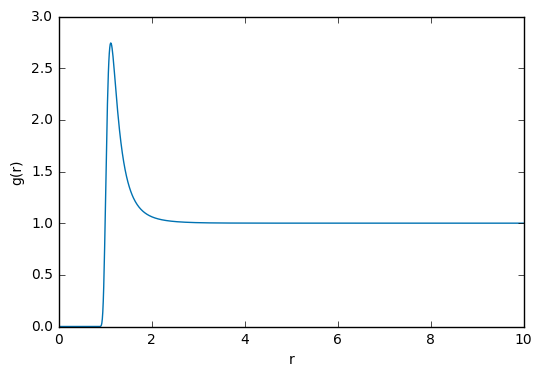

In [4]:
plt.plot(r, g_r[0, 0])
plt.xlabel('r')
plt.ylabel('g(r)')
plt.xlim(0, 10)